# Importando as dependencias que sao usadas na Regressão Polinomial de Mínimos Quadrados

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
class PolynomialRegression:
    def __init__(self, X_matrix, Y_matrix, lamb=0.01, degree=3):
        self.degree = degree
        
        if self.degree > 1:
            self.X_matrix = self.add_polynomial_terms(X_matrix)
        else:
            self.X_matrix = np.column_stack((np.ones(X_matrix.shape[0]), X_matrix)) # Usar apenas a coluna de 1's
            
        self.Y_matrix = Y_matrix.reshape(-1, 1)
        self.lamb = lamb

        self.r_squared = 0.0
        
    def add_polynomial_terms(self, X_matrix):
        if self.degree == 1:
            return X_matrix
        else:
            polynomial_terms = [X_matrix ** p for p in range(0, self.degree + 1)]
            return np.column_stack(polynomial_terms)

    def least_squares(self):
        return np.linalg.pinv(self.X_matrix) @ self.Y_matrix
    
    def coefficient_of_determination(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        r_squared = 1 - (ss_res / ss_total)

        return r_squared
    
    def fit(self):
        least_squares = self.least_squares()
        
        # O modelo de regressão ajustado (preditor)
        y_pred = self.X_matrix @ least_squares
        
        # Coeficiente de determinação (R²)
        r_squared = self.coefficient_of_determination(self.Y_matrix, y_pred)
        
        # save model informations
        self.r_squared = r_squared
        
        compare_results = {
            'Values': self.Y_matrix.ravel(),
            'Predicts': y_pred.ravel()
        }
        df = pd.DataFrame(compare_results)

        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] Model Order: {self.degree}')
        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] Result \n\n {df}')
        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] Coeficients: {least_squares.T[0]}')
        print('---------------------------------------------------------------------------------------------------------------')
        print(f'[INFO] R-SQUARE:                            {r_squared:.3f}')
        
        # Plotando o gráfico com os dados reais e a curva polinomial do modelo
        self.plot_results(y_pred)

    def plot_results(self, y_pred):
        plt.scatter(self.X_matrix[:, 1], self.Y_matrix, label='Dados Originais')
        
        # Espaçando os dados em intervalor iguais para seja possivel ver a curva do modelo
        X_smooth = np.linspace(np.min(self.X_matrix[:, 1]), np.max(self.X_matrix[:, 1]), 50)
        y_smooth_pred = np.polyval(np.polyfit(self.X_matrix[:, 1], y_pred, self.degree), X_smooth - np.min(self.X_matrix[:, 1])) + y_pred[0]
        
        # Plotar a curva de predição
        plt.plot(X_smooth, y_smooth_pred, label=f'Previsões', color='red', linewidth=2)
        
        plt.title(f'Regressão Polinomial - Grau do Modelo: {self.degree}')
        plt.xlabel('Velocidade (m/s)')
        plt.ylabel('Potência (kW)')
        plt.legend()
        plt.show()

## Carregamento da base de dados e aplicação da classe de regressão multipla

In [4]:
def load_data(data_path):
    # Carregar os dados do arquivo .dat
    data = np.loadtxt(data_path)
    v = data[:, 0]  # Medidas de velocidades
    P = data[:, 1]  # Medidas de potência
    
    return v, P

def main():
    # Carregando a base de dados
    data_path = 'dataset/aerogerador.dat'
    
    X_matrix, Y_matrix = load_data(data_path)
    
    print('------------------------------------ Aplicando a regressao linear multipla ------------------------------------')
    for degree in range(1, 11):
        model = PolynomialRegression(X_matrix=X_matrix, Y_matrix=Y_matrix, degree=degree)
        model.fit()
    print('---------------------------------------------------------------------------------------------------------------')

## Chamando a função principal

------------------------------------ Aplicando a regressao linear multipla ------------------------------------
---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 1
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0 -217.690279
1        0.0 -217.690279
2        0.0 -217.690279
3        0.0 -217.690279
4        0.0 -217.690279
...      ...         ...
2245   508.0  572.523697
2246   508.0  572.523697
2247   508.0  578.168083
2248   508.0  589.456854
2249   503.0  595.101239

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-217.6902791    56.44385545]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:          

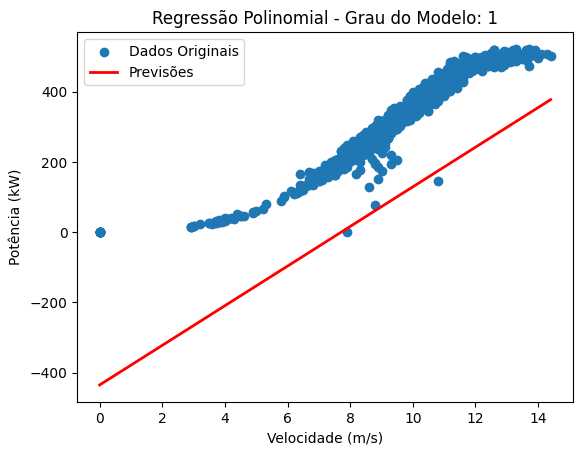

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 2
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0  -92.980030
1        0.0  -92.980030
2        0.0  -92.980030
3        0.0  -92.980030
4        0.0  -92.980030
...      ...         ...
2245   508.0  612.995334
2246   508.0  612.995334
2247   508.0  620.425313
2248   508.0  635.386859
2249   503.0  642.918425

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-92.98003005  26.72314144   1.6931193 ]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                            0.943


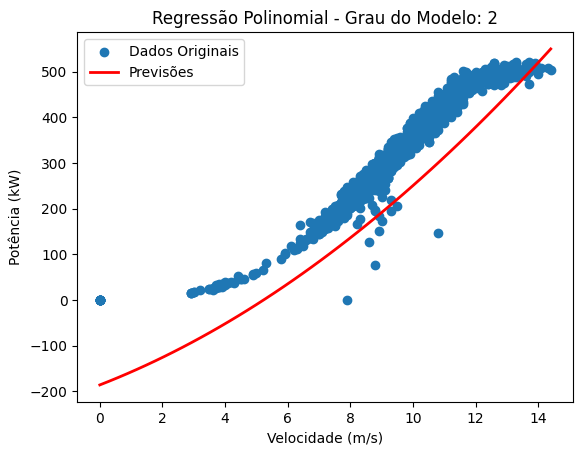

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 3
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0   32.623510
1        0.0   32.623510
2        0.0   32.623510
3        0.0   32.623510
4        0.0   32.623510
...      ...         ...
2245   508.0  534.585055
2246   508.0  534.585055
2247   508.0  535.921896
2248   508.0  537.991606
2249   503.0  538.717367

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [ 32.62351025 -58.76042398  15.05191299  -0.59240797]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                            0.969


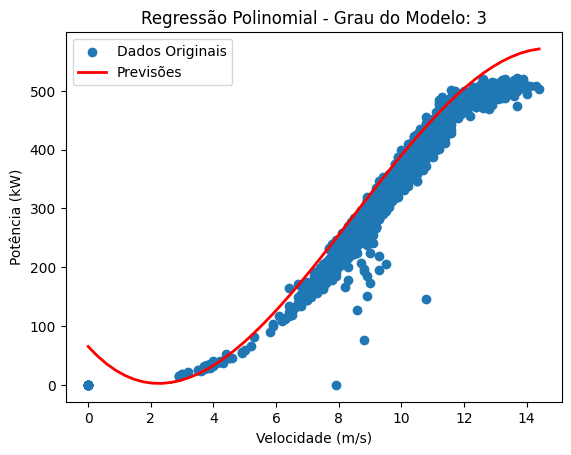

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 4
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0   -0.391326
1        0.0   -0.391326
2        0.0   -0.391326
3        0.0   -0.391326
4        0.0   -0.391326
...      ...         ...
2245   508.0  499.130662
2246   508.0  499.130662
2247   508.0  495.950631
2248   508.0  488.071928
2249   503.0  483.344340

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-0.39132611 10.37288673 -5.00359968  1.43389503 -0.06766974]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                            0.974


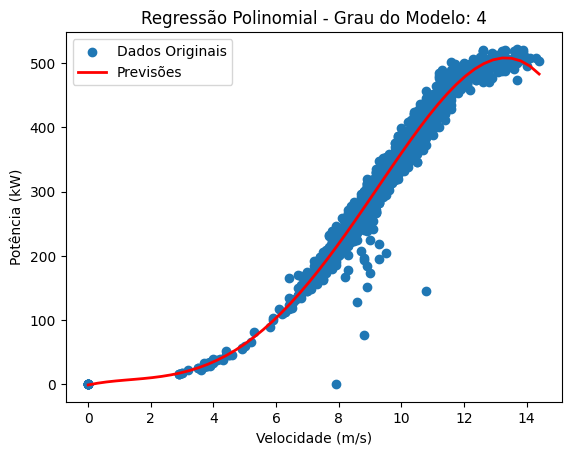

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 5
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0   -0.179826
1        0.0   -0.179826
2        0.0   -0.179826
3        0.0   -0.179826
4        0.0   -0.179826
...      ...         ...
2245   508.0  498.506829
2246   508.0  498.506829
2247   508.0  495.190410
2248   508.0  486.994540
2249   503.0  482.084358

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-1.79826293e-01  8.16387623e+00 -3.93045532e+00  1.24622594e+00
 -5.37024702e-02 -3.75305419e-04]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                            0.974


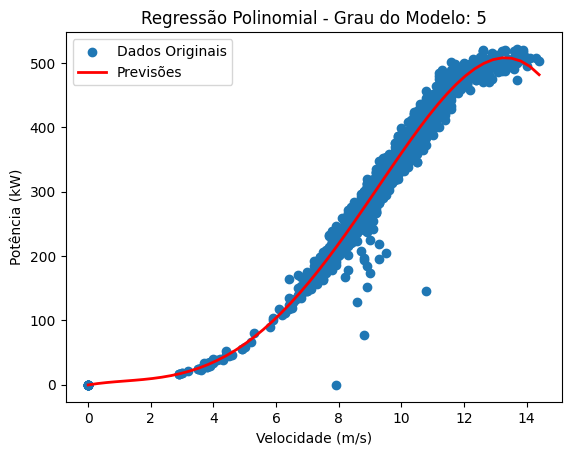

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 6
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0    0.205410
1        0.0    0.205410
2        0.0    0.205410
3        0.0    0.205410
4        0.0    0.205410
...      ...         ...
2245   508.0  501.030513
2246   508.0  501.030513
2247   508.0  498.749399
2248   508.0  493.157940
2249   503.0  489.851609

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [ 2.05409654e-01 -2.46412983e+01  1.75765921e+01 -4.02975014e+00
  5.61364171e-01 -3.47934993e-02  7.44513150e-04]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                            0.974


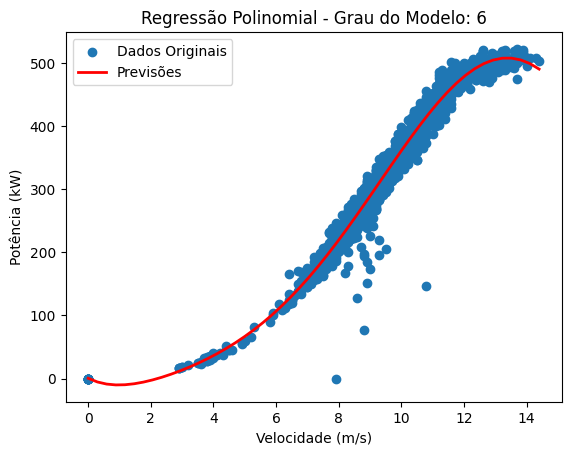

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 7
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0   -0.087907
1        0.0   -0.087907
2        0.0   -0.087907
3        0.0   -0.087907
4        0.0   -0.087907
...      ...         ...
2245   508.0  503.699293
2246   508.0  503.699293
2247   508.0  503.523717
2248   508.0  503.720131
2249   503.0  504.242661

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-8.79068050e-02  1.09572825e+02 -9.00062582e+01  2.99140097e+01
 -4.89659264e+00  4.40494008e-01 -2.06213313e-02  3.88899525e-04]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:                     

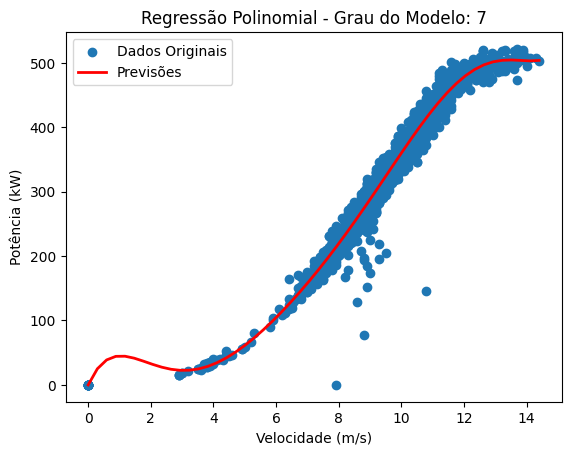

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 8
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0    0.003788
1        0.0    0.003788
2        0.0    0.003788
3        0.0    0.003788
4        0.0    0.003788
...      ...         ...
2245   508.0  504.370230
2246   508.0  504.370230
2247   508.0  506.098012
2248   508.0  512.190743
2249   503.0  516.973470

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [ 3.78814803e-03 -1.20657616e+02  1.34579108e+02 -5.93625073e+01
  1.39583157e+01 -1.85693658e+00  1.41641352e-01 -5.78586434e-03
  9.79840338e-05]
---------------------------------------------------------------------------------------------------------------
[INFO] R-SQUARE:    

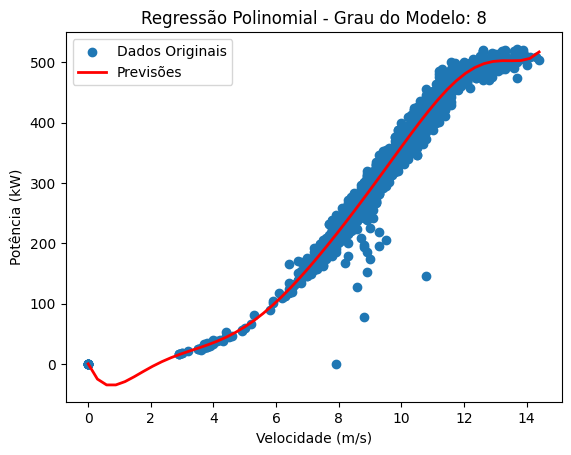

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 9
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0    0.005476
1        0.0    0.005476
2        0.0    0.005476
3        0.0    0.005476
4        0.0    0.005476
...      ...         ...
2245   508.0  504.417019
2246   508.0  504.417019
2247   508.0  506.073002
2248   508.0  511.894220
2249   503.0  516.454405

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [ 5.47553893e-03 -1.46113943e+02  1.63692379e+02 -7.32392467e+01
  1.75744357e+01 -2.42320077e+00  1.96452116e-01 -9.00064372e-03
  2.02784582e-04 -1.45783274e-06]
---------------------------------------------------------------------------------------------------------------
[INF

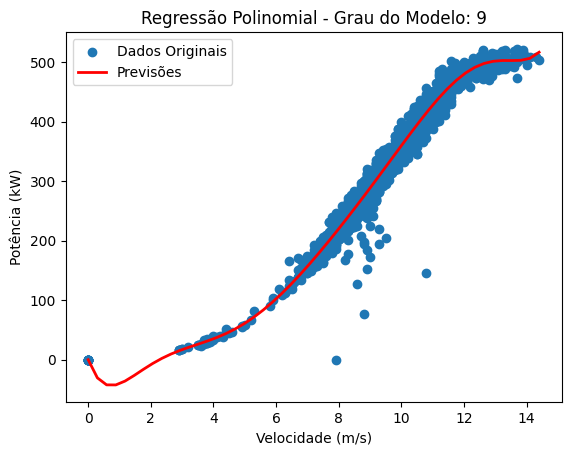

---------------------------------------------------------------------------------------------------------------
[INFO] Model Order: 10
---------------------------------------------------------------------------------------------------------------
[INFO] Result 

       Values    Predicts
0        0.0   -0.001631
1        0.0   -0.001631
2        0.0   -0.001631
3        0.0   -0.001631
4        0.0   -0.001631
...      ...         ...
2245   508.0  506.017541
2246   508.0  506.017541
2247   508.0  506.914158
2248   508.0  508.699408
2249   503.0  509.367103

[2250 rows x 2 columns]
---------------------------------------------------------------------------------------------------------------
[INFO] Coeficients: [-1.63133521e-03  9.00045964e+02 -1.18731930e+03  6.69065374e+02
 -2.11013436e+02  4.12267022e+01 -5.18309213e+00  4.20261164e-01
 -2.12415039e-02  6.08561315e-04 -7.54411723e-06]
---------------------------------------------------------------------------------------------------

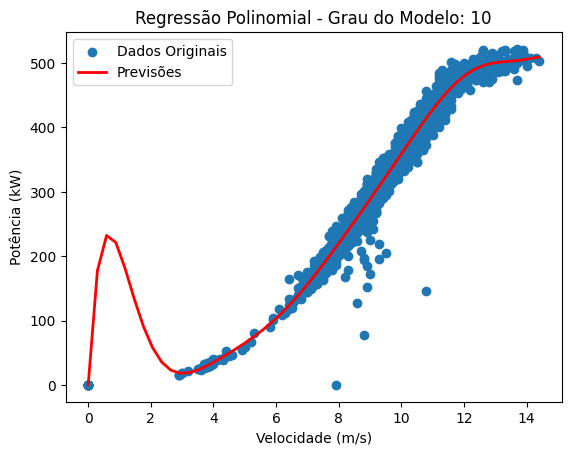

---------------------------------------------------------------------------------------------------------------


In [5]:
main()